In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [108]:
def get_full_df(file_names, years, data_path, column_names):
    dfs = []
    i = 0
    for file in file_names:
        df = pd.read_csv(data_path + file, index_col= None, usecols= column_names, low_memory= False, encoding='utf-8')
        df['year'] = years[i]
        i += 1
        dfs.append(df)

    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

def select_colleges(df, college_list):
    dfs = []
    for college in college_list:
        dfs.append(df.loc[df['INSTNM'] == college])
    tot_df = pd.concat(dfs, axis=0, ignore_index=True)
    return tot_df

data_path = '/mnt/d/Downloads/CollegeScorecard_Raw_Data_01192021/Raw Data Files/'

merged_file_names = ['MERGED1996_97_PP.csv', 'MERGED1997_98_PP.csv', 'MERGED1998_99_PP.csv', 'MERGED1999_00_PP.csv', 'MERGED2000_01_PP.csv', 
                     'MERGED2001_02_PP.csv', 'MERGED2002_03_PP.csv', 'MERGED2003_04_PP.csv', 'MERGED2004_05_PP.csv', 'MERGED2005_06_PP.csv', 
                     'MERGED2006_07_PP.csv', 'MERGED2007_08_PP.csv', 'MERGED2008_09_PP.csv', 'MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 
                     'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 
                     'MERGED2016_17_PP.csv', 'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
merged_years = list(range(1996, 2019))
merged_cols = pd.read_csv(data_path + 'MERGED1996_97_PP.csv', index_col=0, nrows=0).columns.tolist()

field_file_names = ['FieldOfStudyData1415_1516_PP.csv', 'FieldOfStudyData1516_1617_PP.csv', 'Most-Recent-Cohorts-Field-of-Study.csv']
field_years = list(range(2016, 2019))
field_cols = pd.read_csv(data_path + 'FieldOfStudyData1415_1516_PP.csv', index_col=0, nrows=0).columns.tolist()

price_file_names = ['MERGED2009_10_PP.csv', 'MERGED2010_11_PP.csv', 'MERGED2011_12_PP.csv', 'MERGED2012_13_PP.csv', 
                    'MERGED2013_14_PP.csv', 'MERGED2014_15_PP.csv', 'MERGED2015_16_PP.csv', 'MERGED2016_17_PP.csv', 
                    'MERGED2017_18_PP.csv', 'Most-Recent-Cohorts-All-Data-Elements.csv']
price_years = list(range(2009, 2019))

base_cols = ['UNITID', 'OPEID6', 'INSTNM']
colleges = ["University of Colorado Boulder", "University of San Diego", "University of California-Los Angeles", "New York University", "The University of Texas at Austin"]

In [109]:
price_cols = ['COSTT4_A', 'COSTT4_P']
price_df = get_full_df(price_file_names, price_years, data_path, base_cols + price_cols)

In [110]:
price_college_df = select_colleges(price_df, colleges)

In [111]:
price_college_df = price_college_df.replace(np.nan, 0)
price_college_df['avg_cost'] = price_college_df['COSTT4_A'] + price_college_df['COSTT4_P']
price_college_df["net_price"] = price_college_df['NPT4_PUB'] + price_college_df['NPT4_PRIV']
price_college_df.sample(5)

,UNITID,OPEID6,INSTNM,NPT4_PUB,NPT4_PRIV,COSTT4_A,COSTT4_P,year,avg_cost,net_price
23,110662,1315,University of California-Los Angeles,14437.0,0.0,31216.0,0.0,2012,31216.0,14437.0
15,122436,10395,University of San Diego,0.0,30191.0,57593.0,0.0,2014,57593.0,30191.0
4,126614,1370,University of Colorado Boulder,21849.0,0.0,27854.0,0.0,2013,27854.0,21849.0
14,122436,10395,University of San Diego,0.0,31593.0,56346.0,0.0,2013,56346.0,31593.0
42,228778,3658,The University of Texas at Austin,15366.0,0.0,23839.0,0.0,2011,23839.0,15366.0


<AxesSubplot:xlabel='year', ylabel='avg_cost'>

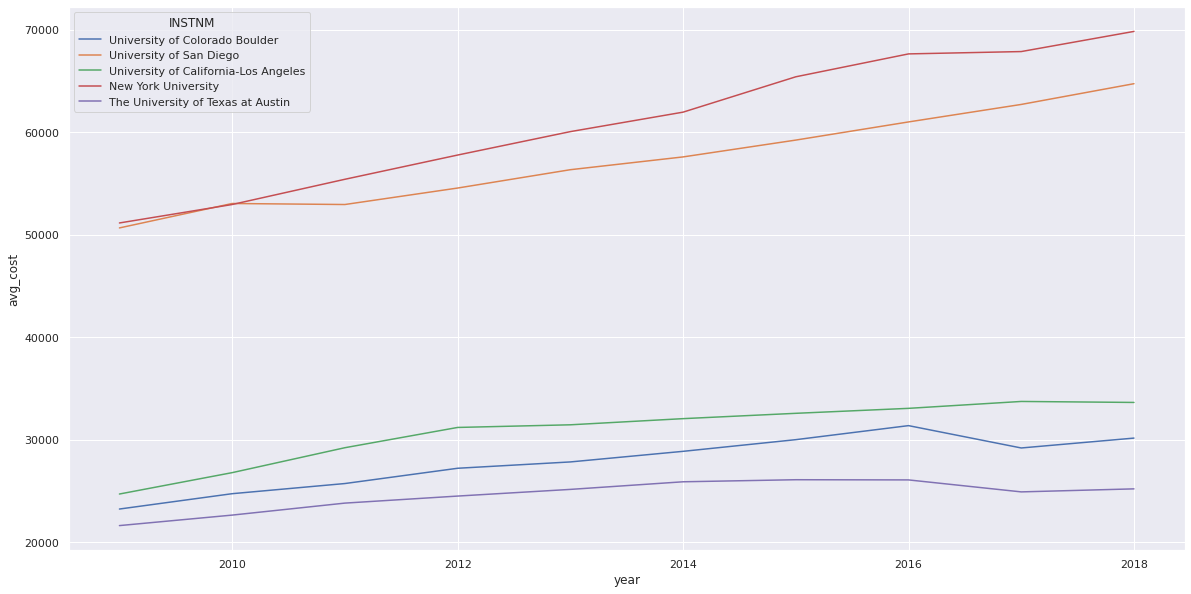

In [113]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='year', y='avg_cost', hue='INSTNM', 
             data=price_college_df)

In [116]:
price_18_df = price_df.loc[price_df['year'] == 2018]
price_18_df = price_18_df.replace(np.nan, 0)
price_18_df["avg_cost"] = price_18_df['NPT4_PUB'] + price_18_df['NPT4_PRIV']
price_18_df = price_18_df.loc[price_18_df['avg_cost'] > 0]

In [118]:
price_18_college_df = select_colleges(price_18_df, colleges)
price_18_college_df['color'] = sns.color_palette("muted", 5)

In [119]:
price_18_college_df.head()

,UNITID,OPEID6,INSTNM,NPT4_PUB,NPT4_PRIV,COSTT4_A,COSTT4_P,year,avg_cost,color
0,126614,1370,University of Colorado Boulder,21510.0,0.0,30178.0,0.0,2018,21510.0,"(0.2823529411764706, 0.47058823529411764, 0.81..."
1,122436,10395,University of San Diego,0.0,32576.0,64732.0,0.0,2018,32576.0,"(0.9333333333333333, 0.5215686274509804, 0.290..."
2,110662,1315,University of California-Los Angeles,14171.0,0.0,33654.0,0.0,2018,14171.0,"(0.41568627450980394, 0.8, 0.39215686274509803)"
3,193900,2785,New York University,0.0,42397.0,69830.0,0.0,2018,42397.0,"(0.8392156862745098, 0.37254901960784315, 0.37..."
4,228778,3658,The University of Texas at Austin,16505.0,0.0,25228.0,0.0,2018,16505.0,"(0.5843137254901961, 0.4235294117647059, 0.705..."


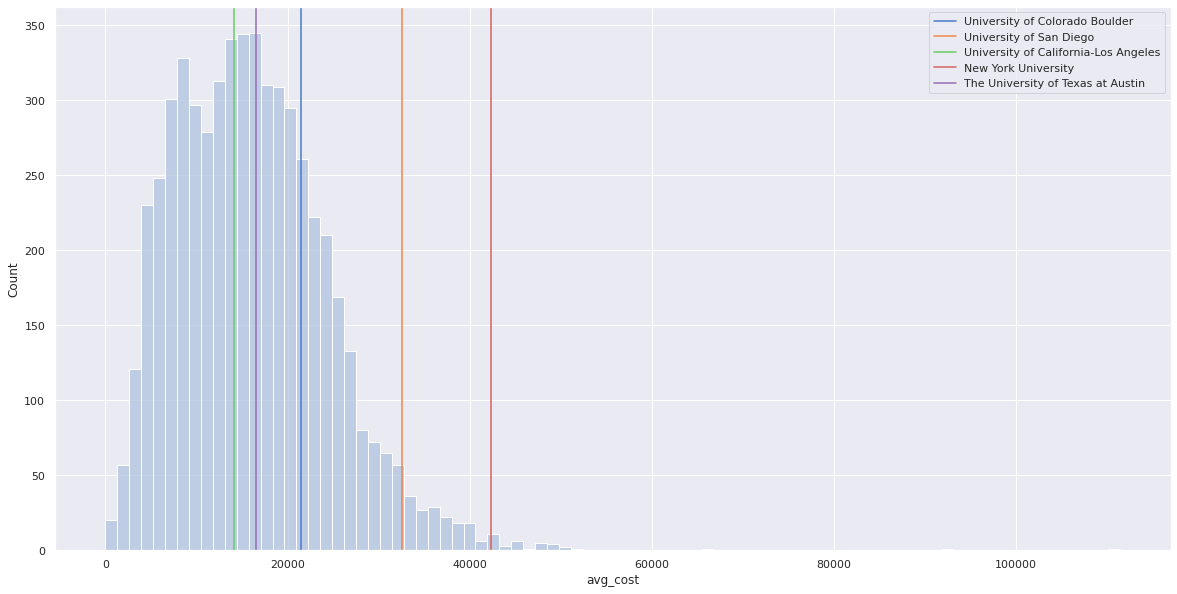

In [120]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(x='avg_cost', color = 'lightsteelblue',
             data=price_18_df)
for index, row in price_18_college_df.iterrows():
    plt.axvline(row['avg_cost'], label='{}'.format(row['INSTNM']), color=row['color'])
    
plt.legend()